 

#      Project:                 ****Bank Credit Card Default Prediction****


## Problem Statement 
                     
The banks with the invent of credit card were more focused on the number of customers 
using their credit service but the drawback of them not being able to pay back the credit
in time was an issue that soon followed, a system was in need to effectively decide the 
credit limit to be allowed to a person based on his previous credit history. 

We are going to build a classification model using **Logistic Regression**, **Random Forest** and **XGBoost** to predict the credibility 
of the customer,in order to minimize the risk and maximize the profit of German Credit Bank.
                      

# Loading Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os as os

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Let's Check out the Data Set

In [2]:
cr_train = pd.read_csv("Credit_Risk_Train_data.csv")
cr_valid = pd.read_csv("Credit_Risk_Validate_data.csv")
cr_test = pd.read_csv("Credit_Risk_Test_data.csv")

In [3]:
print("Dimension of Train Dataset:{}".format(cr_train.shape))
print("Dimension of Validate Dataset:{}".format(cr_valid.shape))
print("Dimension of Test Dataset:{}".format(cr_test.shape))

Dimension of Train Dataset:(614, 13)
Dimension of Validate Dataset:(367, 13)
Dimension of Test Dataset:(367, 12)


In [4]:
cr_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis

In [5]:
cr_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
cr_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
cr_train = cr_train.drop('Loan_ID', axis = 1)

## Missing Values

In [8]:
cr_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
## Here we will check the percentage of nan values present in each feature

## 1 -step make the list of features which has missing values

features_with_na=[features for features in cr_train.columns if cr_train[features].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(cr_train[feature].isnull().mean(), 4),  ' % missing values')

Gender 0.0212  % missing values
Married 0.0049  % missing values
Dependents 0.0244  % missing values
Self_Employed 0.0521  % missing values
LoanAmount 0.0358  % missing values
Loan_Amount_Term 0.0228  % missing values
Credit_History 0.0814  % missing values


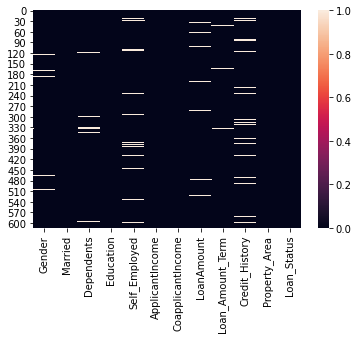

In [10]:
#using heatmap for nullvalues
sns.heatmap(cr_train.isnull(), cmap = None, annot = None)
plt.show()

In [11]:
#columns name
cr_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
# list of numerical variables
num_var = [feature for feature in cr_train.columns if cr_train[feature].dtypes != 'O']
cr_train[num_var]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [13]:
# list of actegorical variables
cat_var = [feature for feature in cr_train.columns if cr_train[feature].dtypes == 'O']
cr_train[cat_var]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


## Univariate Analysis

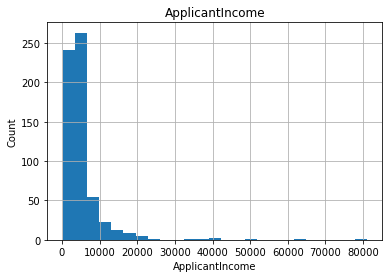

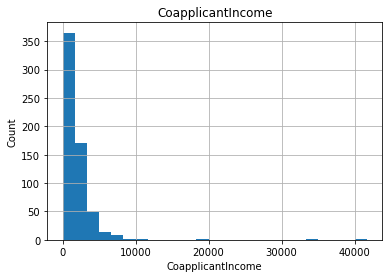

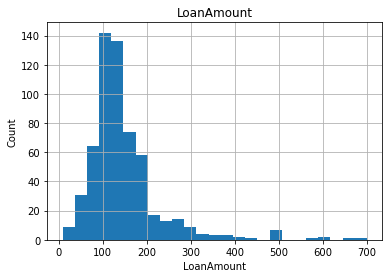

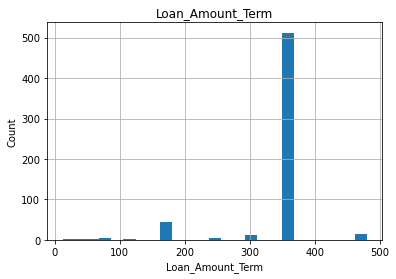

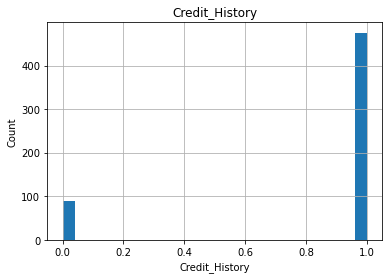

In [14]:
## Lets analyse the numeric variables by creating histograms to understand the distribution

for feature in num_var:
    data=cr_train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

'ApplicantIncome', 'CoapplicantIncome' and 'LoanAmount' all these features are right skewed. This simply indicate that there are very less number of Applicant who has high income and also less number of applicant has asked for large amount for loan.

In [15]:
cr_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

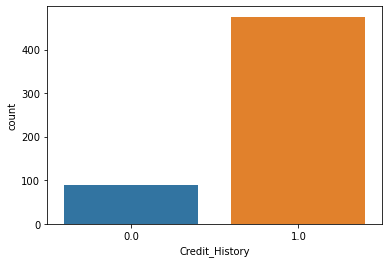

In [16]:
sns.countplot(cr_train['Credit_History'])

In this dataset we have more number of applicant having credit history as 1

In [17]:
cr_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

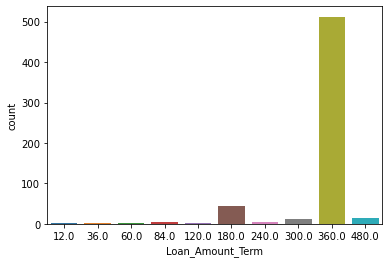

In [18]:
sns.countplot(cr_train['Loan_Amount_Term'])

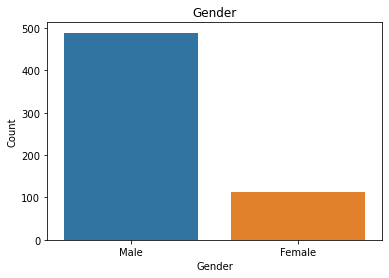

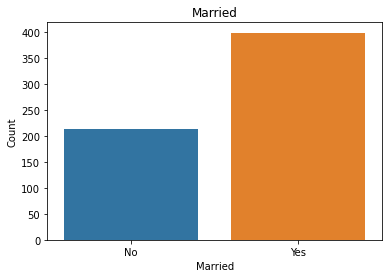

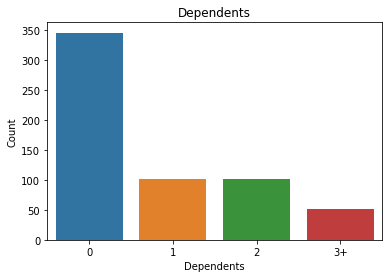

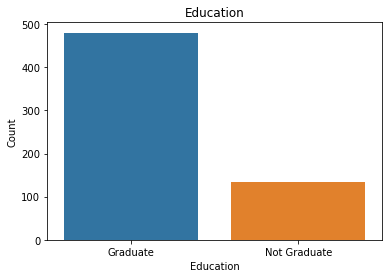

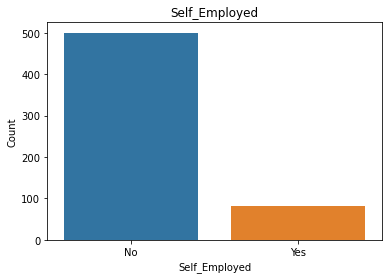

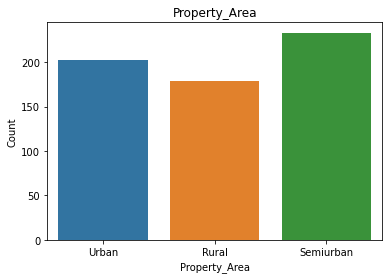

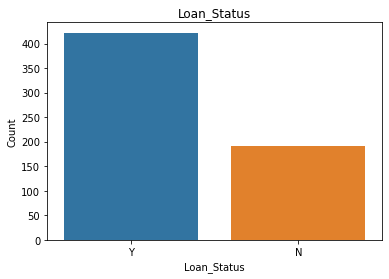

In [19]:
## Lets analyse the categorical varaibles

for feature in cat_var:
    data=cr_train.copy()
    sns.countplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## Bivariate Analysis

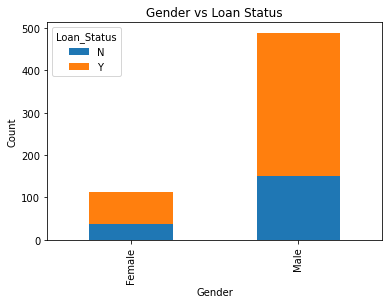

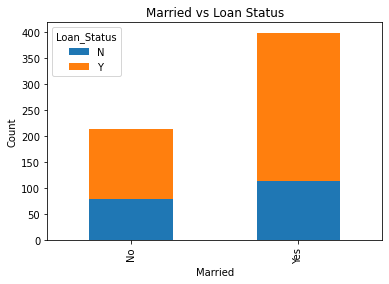

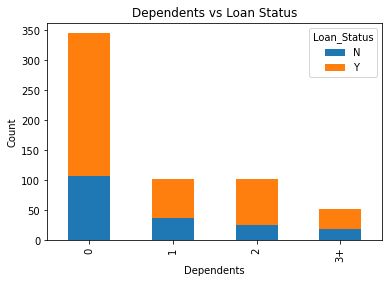

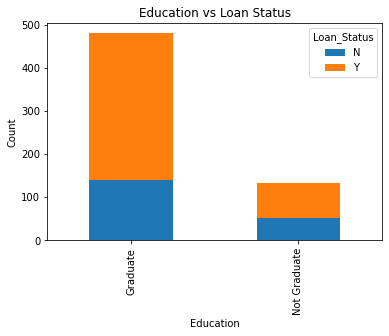

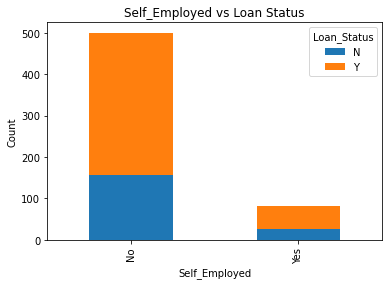

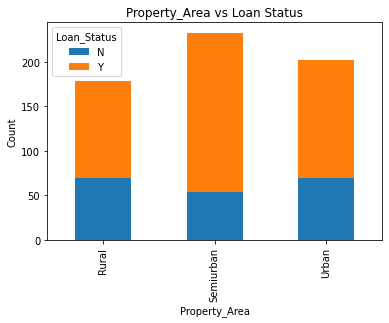

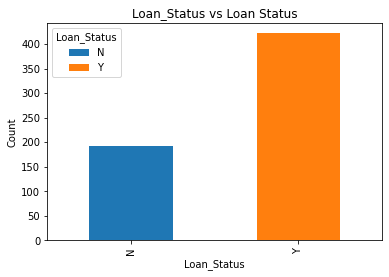

In [20]:
## Lets analyse the categorical varaibles with respect to Target Variable

for feature in cat_var:
    data=cr_train.copy()
    tab = pd.crosstab(data[feature], cr_train["Loan_Status"])
    tab.plot.bar(stacked=True)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title("{} vs Loan Status".format(feature))
    plt.show()

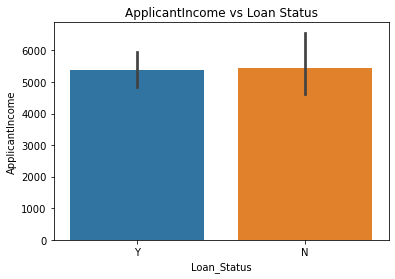

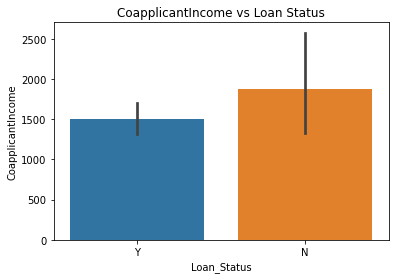

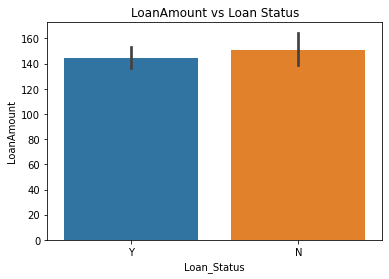

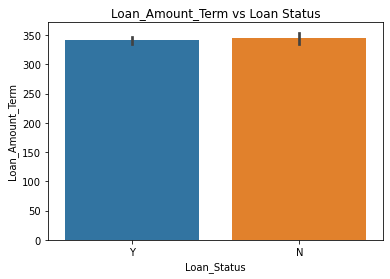

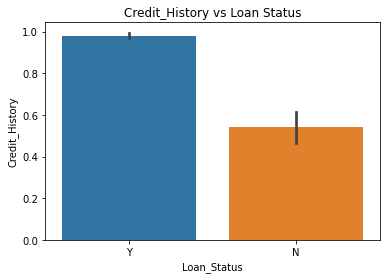

In [21]:
## Lets analyse the numerical varaibles with respect to Target Variable

for feature in num_var:
    data=cr_train.copy()
    sns.barplot(x= "Loan_Status", y = feature, data = data)
    plt.xlabel("Loan_Status")
    plt.ylabel(feature)
    plt.title("{} vs Loan Status".format(feature))
    plt.show()

## Multivariate Analysis

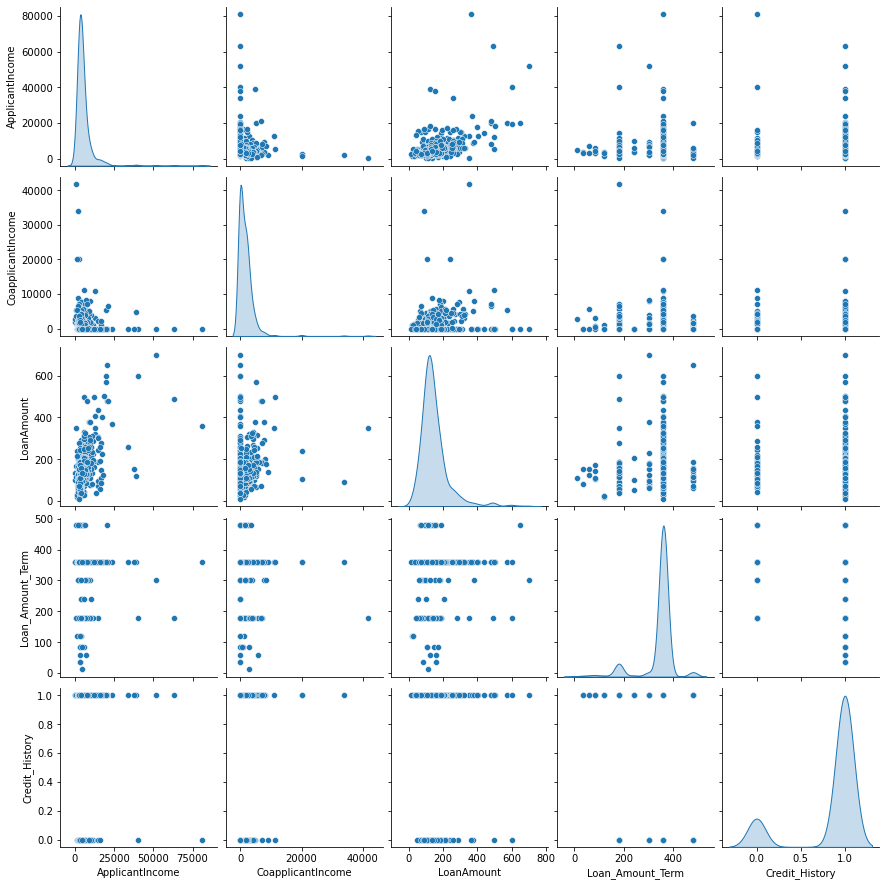

In [22]:
sns.pairplot(cr_train, diag_kind='kde')

In [23]:
cr_train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


LoanAmount is 57% correlated with ApplicantIncome, This indicate that applicant who has good income ask for big amount for loan.

# Feature Engineering

In [24]:
cr_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [25]:
cr_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Handling Missing Values

### Categorical Variables

Imputation of missing values with their modular value in case of categorical feature.

#### Gender

In [26]:
cr_train["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [27]:
cr_train["Gender"].fillna("Male", inplace = True)

#### Married

In [28]:
cr_train["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [29]:
cr_train["Married"].fillna("Yes", inplace = True)

#### Dependents

In [30]:
cr_train["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [31]:
cr_train["Dependents"].fillna(0, inplace = True)

#### Self_Employed

In [32]:
cr_train["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [33]:
cr_train["Self_Employed"].fillna("No", inplace = True)

#### Credit_History

In [34]:
cr_train["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [35]:
cr_train["Credit_History"].fillna(1, inplace = True)

### Numeric Variables

Imputation of missing values with median value of feature in case of numerical feature.

#### LoanAmount

In [36]:
med = cr_train["LoanAmount"].median(skipna=True);med

128.0

In [37]:
cr_train["LoanAmount"].fillna(128, inplace = True)

#### Loan_Amount_Term 

In [38]:
med1 = cr_train["Loan_Amount_Term"].median(skipna=True);med1

360.0

In [39]:
cr_train["Loan_Amount_Term"].fillna(360, inplace = True)

In [40]:
cr_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All missing values get imputated

### Validation Data Set

In [41]:
cr_valid = cr_valid.drop('Loan_ID', axis = 1)

In [42]:
cr_valid.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
outcome               0
dtype: int64

In [43]:
#Imputation of missing values

#categorical variables

cr_valid["Gender"].fillna("Male", inplace = True)
cr_valid["Dependents"].fillna(0, inplace = True)
cr_valid["Self_Employed"].fillna("No", inplace = True)
cr_valid["Credit_History"].fillna(1, inplace = True)

#numerical variables

cr_valid["LoanAmount"].fillna(cr_valid["LoanAmount"].median(skipna=True), inplace = True)
cr_valid["Loan_Amount_Term"].fillna(cr_valid["Loan_Amount_Term"].median(skipna=True), inplace = True)

In [44]:
cr_valid.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
outcome              0
dtype: int64

### Testing Data set

In [45]:
cr_test = cr_test.drop('Loan_ID', axis = 1)

In [46]:
cr_test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [47]:
#Imputation of missing values

#categorical variables

cr_test["Gender"].fillna("Male", inplace = True)
cr_test["Dependents"].fillna(0, inplace = True)
cr_test["Self_Employed"].fillna("No", inplace = True)
cr_test["Credit_History"].fillna(1, inplace = True)

#numerical variables

cr_test["LoanAmount"].fillna(cr_test["LoanAmount"].median(skipna=True), inplace = True)
cr_test["Loan_Amount_Term"].fillna(cr_test["Loan_Amount_Term"].median(skipna=True), inplace = True)

In [48]:
cr_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Handling Categorical Variables

### Training Data Set

In [49]:
cr_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [50]:
cr_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [56]:
#creating dummy variables for categorical variables

#Gender
gender = pd.get_dummies(cr_train["Gender"], drop_first = True, dtype=int)

#Married
married = pd.get_dummies(cr_train["Married"], drop_first = True, dtype=int)

#Dependents
dependents = pd.get_dummies(cr_train["Dependents"], drop_first = True, dtype=int)

#Education
education = pd.get_dummies(cr_train["Education"], drop_first = True, dtype=int)

#Self_Employed
self_employed = pd.get_dummies(cr_train["Self_Employed"], drop_first = True, dtype=int)

#Credit_History
credit_history = pd.get_dummies(cr_train["Credit_History"], drop_first = True, dtype=int)

#Property_Area
property_area = pd.get_dummies(cr_train["Property_Area"], drop_first = True, dtype=int)


In [57]:
#Dropping actual columns 

cr_train.drop("Gender", axis = 1, inplace = True)
cr_train.drop("Married", axis = 1, inplace = True)
cr_train.drop("Education", axis = 1, inplace = True)
cr_train.drop("Self_Employed", axis = 1, inplace = True)
cr_train.drop("Dependents", axis = 1, inplace = True)
cr_train.drop("Property_Area", axis = 1, inplace = True)
cr_train.drop("Credit_History", axis = 1, inplace = True)

In [58]:
cr_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,5849,0.0,128.0,360.0,Y
1,4583,1508.0,128.0,360.0,N
2,3000,0.0,66.0,360.0,Y
3,2583,2358.0,120.0,360.0,Y
4,6000,0.0,141.0,360.0,Y


In [59]:
#concatenating dummy variables with cr_train

cr_train = pd.concat([gender,married,dependents,education,self_employed,credit_history,property_area, cr_train],axis = 1)
cr_train.head()   

,Male,Yes,0,1,2,3+,Not Graduate,Yes,1.0,Semiurban,Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,1,0,0,0,0,0,1,0,1,5849,0.0,128.0,360.0,Y
1,1,1,0,1,0,0,0,0,1,0,0,4583,1508.0,128.0,360.0,N
2,1,1,1,0,0,0,0,1,1,0,1,3000,0.0,66.0,360.0,Y
3,1,1,1,0,0,0,1,0,1,0,1,2583,2358.0,120.0,360.0,Y
4,1,0,1,0,0,0,0,0,1,0,1,6000,0.0,141.0,360.0,Y


#### Convert Loan_Status value of Y and N to a numerical value

In [71]:
def loan_status(Loan_Status):
    if Loan_Status == "Y":
        return 1
    else :
        return 0

In [72]:
cr_train["Loan_Status"] = cr_train["Loan_Status"].apply(loan_status)

In [73]:
cr_train.head()

,Male,Yes,0,1,2,3+,Not Graduate,Yes,1.0,Semiurban,Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,1,0,0,0,0,0,1,0,1,5849,0.0,128.0,360.0,1
1,1,1,0,1,0,0,0,0,1,0,0,4583,1508.0,128.0,360.0,0
2,1,1,1,0,0,0,0,1,1,0,1,3000,0.0,66.0,360.0,1
3,1,1,1,0,0,0,1,0,1,0,1,2583,2358.0,120.0,360.0,1
4,1,0,1,0,0,0,0,0,1,0,1,6000,0.0,141.0,360.0,1


In [74]:
#final training data set

training_data = cr_train.copy()

In [98]:
x_train = training_data.drop("Loan_Status", axis = 1)

y_train = training_data["Loan_Status"]

In [99]:
x_train.head()

,Male,Yes,0,1,2,3+,Not Graduate,Yes,1.0,Semiurban,Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,1,0,0,0,0,0,1,0,1,5849,0.0,128.0,360.0
1,1,1,0,1,0,0,0,0,1,0,0,4583,1508.0,128.0,360.0
2,1,1,1,0,0,0,0,1,1,0,1,3000,0.0,66.0,360.0
3,1,1,1,0,0,0,1,0,1,0,1,2583,2358.0,120.0,360.0
4,1,0,1,0,0,0,0,0,1,0,1,6000,0.0,141.0,360.0


In [100]:
y_train.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

### Validation Data Set

In [75]:
cr_valid.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,outcome
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,Y
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N


In [78]:
cr_valid.rename(columns = {"outcome":"Loan_Status"}, inplace = True)

In [79]:
cr_valid.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,Y
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N


In [80]:
#creating dummy variables for categorical variables

#Gender
gender = pd.get_dummies(cr_valid["Gender"], drop_first = True, dtype=int)

#Married
married = pd.get_dummies(cr_valid["Married"], drop_first = True, dtype=int)

#Dependents
dependents = pd.get_dummies(cr_valid["Dependents"], drop_first = True, dtype=int)

#Education
education = pd.get_dummies(cr_valid["Education"], drop_first = True, dtype=int)

#Self_Employed
self_employed = pd.get_dummies(cr_valid["Self_Employed"], drop_first = True, dtype=int)

#Credit_History
credit_history = pd.get_dummies(cr_valid["Credit_History"], drop_first = True, dtype=int)

#Property_Area
property_area = pd.get_dummies(cr_valid["Property_Area"], drop_first = True, dtype=int)


In [81]:
#Dropping actual columns 

cr_valid.drop("Gender", axis = 1, inplace = True)
cr_valid.drop("Married", axis = 1, inplace = True)
cr_valid.drop("Education", axis = 1, inplace = True)
cr_valid.drop("Self_Employed", axis = 1, inplace = True)
cr_valid.drop("Dependents", axis = 1, inplace = True)
cr_valid.drop("Property_Area", axis = 1, inplace = True)
cr_valid.drop("Credit_History", axis = 1, inplace = True)

In [82]:
cr_valid.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,5720,0,110.0,360.0,Y
1,3076,1500,126.0,360.0,Y
2,5000,1800,208.0,360.0,Y
3,2340,2546,100.0,360.0,Y
4,3276,0,78.0,360.0,N


In [83]:
#concatenating dummy variables with cr_valid

cr_valid = pd.concat([gender,married,dependents,education,self_employed,credit_history,property_area, cr_valid],axis = 1)
cr_valid.head()

,Male,Yes,0,1,2,3+,Not Graduate,Yes,1.0,Semiurban,Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,1,1,0,0,0,0,0,1,0,1,5720,0,110.0,360.0,Y
1,1,1,0,1,0,0,0,0,1,0,1,3076,1500,126.0,360.0,Y
2,1,1,0,0,1,0,0,0,1,0,1,5000,1800,208.0,360.0,Y
3,1,1,0,0,1,0,0,0,1,0,1,2340,2546,100.0,360.0,Y
4,1,0,1,0,0,0,1,0,1,0,1,3276,0,78.0,360.0,N


#### Convert Loan_Status value of Y and N to a numerical value

In [84]:
def loan_status(Loan_Status):
    if Loan_Status == "Y":
        return 1
    else :
        return 0

In [85]:
cr_valid["Loan_Status"] = cr_valid["Loan_Status"].apply(loan_status)

In [86]:
cr_valid.head()

,Male,Yes,0,1,2,3+,Not Graduate,Yes,1.0,Semiurban,Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,1,1,0,0,0,0,0,1,0,1,5720,0,110.0,360.0,1
1,1,1,0,1,0,0,0,0,1,0,1,3076,1500,126.0,360.0,1
2,1,1,0,0,1,0,0,0,1,0,1,5000,1800,208.0,360.0,1
3,1,1,0,0,1,0,0,0,1,0,1,2340,2546,100.0,360.0,1
4,1,0,1,0,0,0,1,0,1,0,1,3276,0,78.0,360.0,0


In [87]:
# final validation data set

validation_data = cr_valid.copy()

In [101]:
x_valid = validation_data.drop("Loan_Status", axis = 1)

y_valid = validation_data["Loan_Status"]

In [102]:
x_valid.head()

,Male,Yes,0,1,2,3+,Not Graduate,Yes,1.0,Semiurban,Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,1,1,0,0,0,0,0,1,0,1,5720,0,110.0,360.0
1,1,1,0,1,0,0,0,0,1,0,1,3076,1500,126.0,360.0
2,1,1,0,0,1,0,0,0,1,0,1,5000,1800,208.0,360.0
3,1,1,0,0,1,0,0,0,1,0,1,2340,2546,100.0,360.0
4,1,0,1,0,0,0,1,0,1,0,1,3276,0,78.0,360.0


In [103]:
y_valid.head()

0    1
1    1
2    1
3    1
4    0
Name: Loan_Status, dtype: int64

### Testing Data Set

In [88]:
cr_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [90]:
#creating dummy variables for categorical variables

#Gender
gender = pd.get_dummies(cr_test["Gender"], drop_first = True, dtype=int)

#Married
married = pd.get_dummies(cr_test["Married"], drop_first = True, dtype=int)

#Dependents
dependents = pd.get_dummies(cr_test["Dependents"], drop_first = True, dtype=int)

#Education
education = pd.get_dummies(cr_test["Education"], drop_first = True, dtype=int)

#Self_Employed
self_employed = pd.get_dummies(cr_test["Self_Employed"], drop_first = True, dtype=int)

#Credit_History
credit_history = pd.get_dummies(cr_test["Credit_History"], drop_first = True, dtype=int)

#Property_Area
property_area = pd.get_dummies(cr_test["Property_Area"], drop_first = True, dtype=int)


In [91]:
#Dropping actual columns 

cr_test.drop("Gender", axis = 1, inplace = True)
cr_test.drop("Married", axis = 1, inplace = True)
cr_test.drop("Education", axis = 1, inplace = True)
cr_test.drop("Self_Employed", axis = 1, inplace = True)
cr_test.drop("Dependents", axis = 1, inplace = True)
cr_test.drop("Property_Area", axis = 1, inplace = True)
cr_test.drop("Credit_History", axis = 1, inplace = True)

In [93]:
cr_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5720,0,110.0,360.0
1,3076,1500,126.0,360.0
2,5000,1800,208.0,360.0
3,2340,2546,100.0,360.0
4,3276,0,78.0,360.0


In [94]:
#concatenating dummy variables with cr_test

cr_test = pd.concat([gender,married,dependents,education,self_employed,credit_history,property_area, cr_test],axis = 1)
cr_test.head()

,Male,Yes,0,1,2,3+,Not Graduate,Yes,1.0,Semiurban,Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,1,1,0,0,0,0,0,1,0,1,5720,0,110.0,360.0
1,1,1,0,1,0,0,0,0,1,0,1,3076,1500,126.0,360.0
2,1,1,0,0,1,0,0,0,1,0,1,5000,1800,208.0,360.0
3,1,1,0,0,1,0,0,0,1,0,1,2340,2546,100.0,360.0
4,1,0,1,0,0,0,1,0,1,0,1,3276,0,78.0,360.0


In [95]:
# final testing data set 

testing_data = cr_test.copy()

In [104]:
x_test = testing_data.copy()

# Model Creation

I am going to create multiple binary classification models and then the model which will give good accuarcy and perform better in term of evaluation metrics, will going to select that model.

I am also going to use hyperparameter tuning for hyperparameters.

## Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression

In [109]:
#intializing LogisticRegression to object logmodel

logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [112]:
#making prediction using validation data set
predictions = logmodel.predict(x_valid)

### Evaluation Metrics

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [114]:
print(confusion_matrix(predictions,y_valid))
print(accuracy_score(predictions,y_valid))
print(classification_report(predictions,y_valid))

[[ 56   3]
 [ 21 287]]
0.9346049046321526
              precision    recall  f1-score   support

           0       0.73      0.95      0.82        59
           1       0.99      0.93      0.96       308

    accuracy                           0.93       367
   macro avg       0.86      0.94      0.89       367
weighted avg       0.95      0.93      0.94       367



When using logistic regression, we are getting 93.46% as accuracy but here our dataset is imbalanced so we also have to take care of precision and recall values.

Let's see if we able to improve these two values in further models.

## Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier()

### Hyperparameter optimization using RandomizedSearchCV

In [117]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]

# Minimum number of samples required to split a node
min_samples_split = [1, 2, 3, 4, 5, 7, 9]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 2, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [118]:
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [120]:
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 2, 3, 4, 5, 7,
                                                              9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   

In [121]:
#best parameter
rf_randomcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 3,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'gini'}

In [122]:
#best estimator
rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=1000, max_features='sqrt', min_samples_leaf=6,
                       min_samples_split=3, n_estimators=800)

In [123]:
#best model from random search cv
rf_model = rf_randomcv.best_estimator_

In [124]:
#making prediction using validation data set
rf_predictions = rf_model.predict(x_valid)

### Evaluation Metrics

In [125]:
print(confusion_matrix(rf_predictions,y_valid))
print(accuracy_score(rf_predictions,y_valid))
print(classification_report(rf_predictions,y_valid))

[[ 58   1]
 [ 19 289]]
0.9455040871934605
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        59
           1       1.00      0.94      0.97       308

    accuracy                           0.95       367
   macro avg       0.87      0.96      0.91       367
weighted avg       0.96      0.95      0.95       367



# Xgboost Classifier

Here i am going to change column name because one duplicate name in column exist such as "Yes". And xgboost does not take dublicate feature name while training model.

In [137]:
x_train.head()

,Male,Yes,0,1,2,3+,Not Graduate,Yes,1.0,Semiurban,Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,1,0,0,0,0,0,1,0,1,5849,0.0,128.0,360.0
1,1,1,0,1,0,0,0,0,1,0,0,4583,1508.0,128.0,360.0
2,1,1,1,0,0,0,0,1,1,0,1,3000,0.0,66.0,360.0
3,1,1,1,0,0,0,1,0,1,0,1,2583,2358.0,120.0,360.0
4,1,0,1,0,0,0,0,0,1,0,1,6000,0.0,141.0,360.0


In [161]:
 col_name = ['Male', 'Married', '0', '1', '2', '3+', 'Not Graduate', 'Self_Employed',
       'Credit_History_1', 'Semiurban', 'Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [162]:
x_train.columns = col_name

In [163]:
x_train.head()

,Male,Married,0,1,2,3+,Not Graduate,Self_Employed,Credit_History_1,Semiurban,Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,1,0,0,0,0,0,1,0,1,5849,0.0,128.0,360.0
1,1,1,0,1,0,0,0,0,1,0,0,4583,1508.0,128.0,360.0
2,1,1,1,0,0,0,0,1,1,0,1,3000,0.0,66.0,360.0
3,1,1,1,0,0,0,1,0,1,0,1,2583,2358.0,120.0,360.0
4,1,0,1,0,0,0,0,0,1,0,1,6000,0.0,141.0,360.0


In [164]:
x_valid.columns = col_name
x_test.columns = col_name

In [127]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [128]:
classifier=xgboost.XGBClassifier()

### Hyperparameter optimization using RandomizedSearchCV

In [130]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [131]:
xg_randomcv = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [165]:
xg_randomcv.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[19:48:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [166]:
#best parameters
xg_randomcv.best_params_

{'min_child_weight': 5,
 'max_depth': 10,
 'learning_rate': 0.25,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [167]:
#best estimator
xg_randomcv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [168]:
#best model from random search cv
xg_model = xg_randomcv.best_estimator_

In [169]:
#mking prediction using validation data set
xg_predictions = xg_model.predict(x_valid)

### Evaluation Metrics

In [170]:
print(confusion_matrix(xg_predictions,y_valid))
print(accuracy_score(xg_predictions,y_valid))
print(classification_report(xg_predictions,y_valid))

[[ 68  10]
 [  9 280]]
0.9482288828337875
              precision    recall  f1-score   support

           0       0.88      0.87      0.88        78
           1       0.97      0.97      0.97       289

    accuracy                           0.95       367
   macro avg       0.92      0.92      0.92       367
weighted avg       0.95      0.95      0.95       367



In [172]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=10,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [178]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x_train,y_train,cv=10)

[20:05:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:05:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:05:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:05:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [179]:
score

array([0.72580645, 0.77419355, 0.77419355, 0.74193548, 0.75409836,
       0.7704918 , 0.85245902, 0.78688525, 0.72131148, 0.85245902])

In [180]:
score.mean()

0.775383395029085